# Crimes in Chicago Data Analysis



## Problem Statement: Analyzing the factors that affect the Crimes in Chicago based on five years data(2012-2017)

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2012 to 2017. Data is extracted from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. In order to protect the privacy of crime victims, addresses are shown at the block level only and specific locations are not identified. This data includes unverified reports supplied to the Police Department.The dataset consists of 23 columns.

### Parameters

ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

### Target Audience

We analyze this data from a perspective of a Chicago resident who wants to know more about their area so they can better navigate their way through the city and it can also help the Police Department to ensure the safety of the residents.

### Questions:

(1)How has crime in Chicago changed across years?Is it Increasing or Decreasing?

(2)Which types of crimes are more likely to happen in specific locations or  specific time of the day or specific day of the week than other types of crimes?

(3)Which crimes are most common among the top 20 most frequent crime types?

## Importing Libraries

In [71]:
import numpy as np 
from io import StringIO
import pandas as pd
import folium
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns


# Reading the dataset

In [79]:
crimes = pd.read_csv("C:\\Users\\APEKSHA\\Desktop\\Chicago_Crimes_2012_to_2017.csv")
crimes

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
5,1108,10508702,HZ250447,05/03/2016 10:35:00 PM,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)"
6,1130,10508703,HZ250489,05/03/2016 10:30:00 PM,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,...,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)"
7,1801,10508704,HZ250514,05/03/2016 09:30:00 PM,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)"
8,1868,10508709,HZ250523,05/03/2016 04:00:00 PM,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,...,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)"
9,1891,10508982,HZ250667,05/03/2016 10:30:00 PM,069XX S ASHLAND AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,17.0,67.0,08B,1166876.0,1858796.0,2016,05/10/2016 03:56:50 PM,41.768097,-87.663879,"(41.768096835, -87.663878589)"


For simplicity, display subset of the datset using head() function

In [3]:
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


To print the index of columns of the dataset

In [4]:
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

## Data Preprocessing and Cleaning

Determining null values in our dataset.

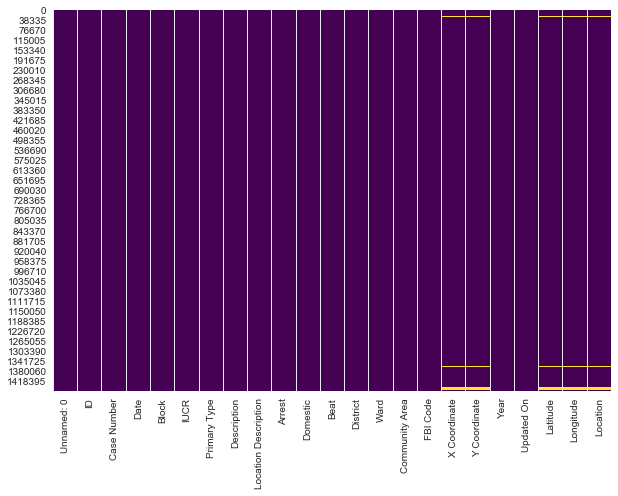

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(crimes.isnull(), cbar = False, cmap = 'viridis')

We will not be using any of those columns in our analysis; so we filter them out.

In [6]:
crimes.drop(['Unnamed: 0', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District'], inplace=True, axis=1)

We will use the 'Date' column to explore temporal patterns, 'Primary Type' and 'Location Description' to investigate their relationship with time (month of the year, time of the day, hour of the day, .. etc).

We need to convert the 'Date' column into a date format that is understandable by Python (and pandas).

In [7]:
# convert dates to pandas datetime format
crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
crimes.index = pd.DatetimeIndex(crimes.Date)

To display records and its corresponding features

In [8]:
crimes.shape

(1456714, 10)

In [9]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1456714 entries, 2016-05-03 23:40:00 to 2016-05-03 23:38:00
Data columns (total 10 columns):
ID                      1456714 non-null int64
Date                    1456714 non-null datetime64[ns]
Block                   1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Latitude                1419631 non-null float64
Longitude               1419631 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 102.8+ MB


As 'Location Description', 'Description' and 'Primary Type' columns are actually categorical columns, we will only keep the most frequent categories and then cast them to a categorical type.

In [10]:
loc_to_change  = list(crimes['Location Description'].value_counts()[20:].index)
desc_to_change = list(crimes['Description'].value_counts()[20:].index)
#type_to_change = list(crimes['Primary Type'].value_counts()[20:].index)

crimes.loc[crimes['Location Description'].isin(loc_to_change) , crimes.columns=='Location Description'] = 'OTHER'
crimes.loc[crimes['Description'].isin(desc_to_change) , crimes.columns=='Description'] = 'OTHER'
#crimes.loc[crimes['Primary Type'].isin(type_to_change) , crimes.columns=='Primary Type'] = 'OTHER'

In [11]:
# we convert those 3 columns into 'Categorical' types -- works like 'factor' in R
crimes['Primary Type']         = pd.Categorical(crimes['Primary Type'])
crimes['Location Description'] = pd.Categorical(crimes['Location Description'])
crimes['Description']          = pd.Categorical(crimes['Description'])

## Data Exploration and Visualization

In [12]:
pd.value_counts(crimes['Location Description'])[:10]

STREET                            330471
RESIDENCE                         233530
OTHER                             202047
APARTMENT                         185023
SIDEWALK                          160891
PARKING LOT/GARAGE(NON.RESID.)     41768
ALLEY                              31771
RESIDENTIAL YARD (FRONT/BACK)      30645
SMALL RETAIL STORE                 28803
SCHOOL, PUBLIC, BUILDING           25959
Name: Location Description, dtype: int64

In [13]:
pd.value_counts(crimes['Primary Type'])[:10]

THEFT                  329460
BATTERY                263700
CRIMINAL DAMAGE        155455
NARCOTICS              135240
ASSAULT                 91289
OTHER OFFENSE           87874
BURGLARY                83397
DECEPTIVE PRACTICE      75495
MOTOR VEHICLE THEFT     61138
ROBBERY                 57313
Name: Primary Type, dtype: int64

To plot the number of crimes per month

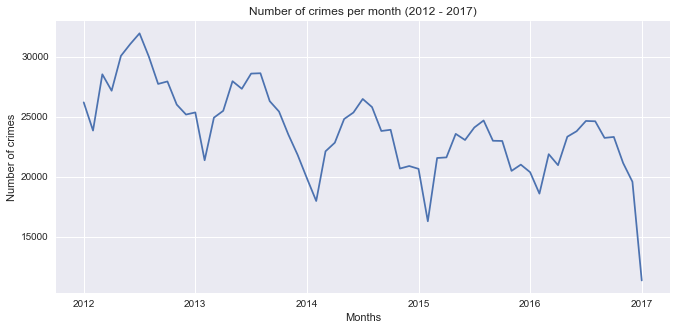

In [14]:
plt.figure(figsize=(11,5))
crimes.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

The previous graph shows monthly crime records.For more finer results,we take into consideration the rolling sum of crimes of the past year.The idea is, for each day, we calculate the sum of crimes of the past year. If this rolling sum is decreasing, then we know for sure that crime rates have been decreasing during that year. On the other hand, if the rolling sum stays the same during a given year, then we can conclude that crime rates stayed the same.

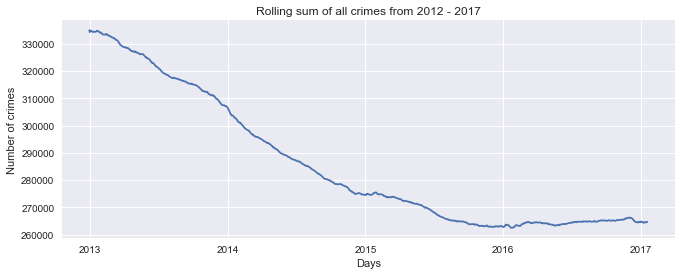

In [15]:
plt.figure(figsize=(11,4))
crimes.resample('D').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2012 - 2017')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()

We see the line decreasing from 2013 up to some point around 2017 after which it stays around the same number of crimes. This all means that 2017 is really no better than 2016, but both years show a much better crime record (in total) than the previous years.

### Separating crimes by type

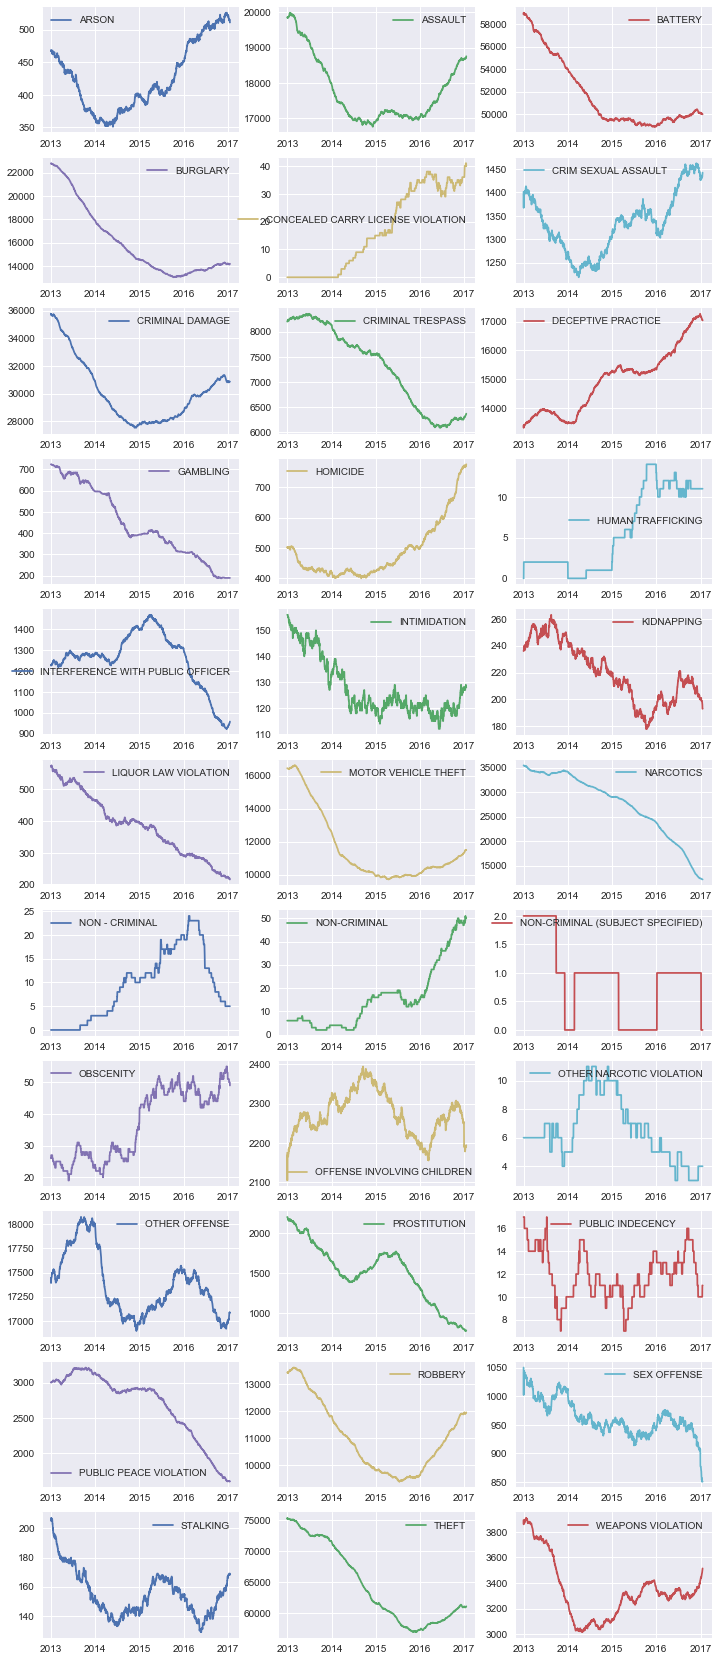

In [16]:
crimes_count_date = crimes.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=crimes.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(12, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)


### Differentiating crime records by time,type and location

Is there a difference in the number of crimes during specific days of the week.Are there more crimes during weekdays or weekend?

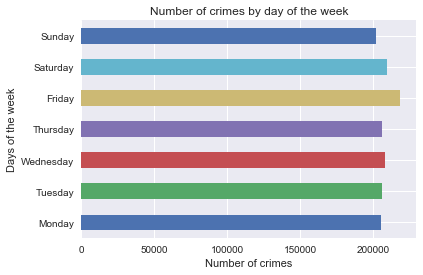

In [17]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crimes.groupby([crimes.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

Here we can see that the highest number of crimes occur on Friday.

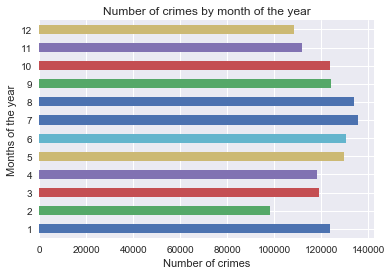

In [18]:
crimes.groupby([crimes.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

Here we can see that July has the highest no of crimes per month,

Which crimes are most common among the top 20 most frequent crime types?

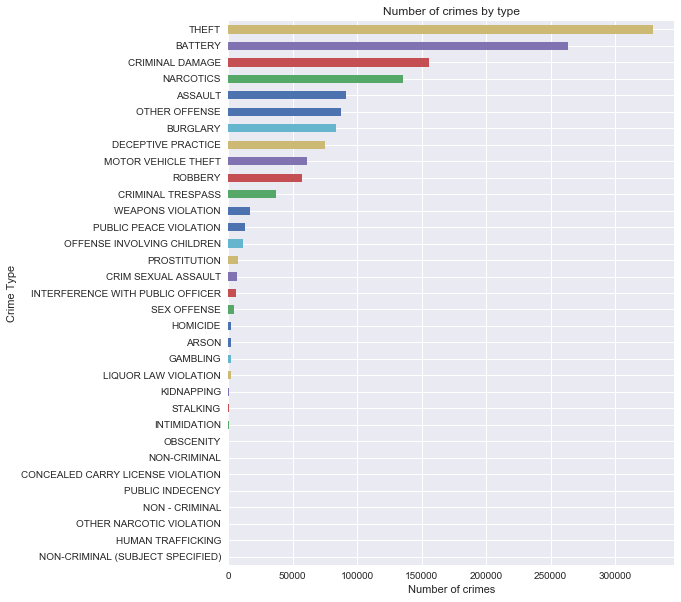

In [19]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

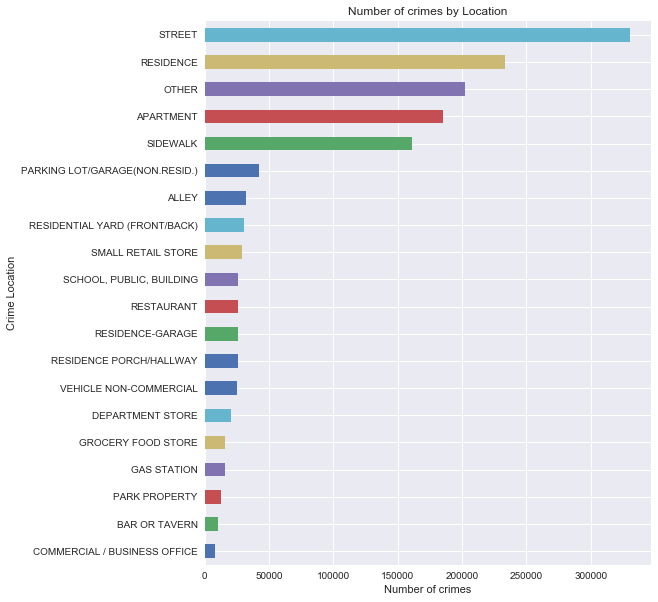

In [20]:
plt.figure(figsize=(8,10))
crimes.groupby([crimes['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

### Creating Heatmaps for each crime to get an idea of where the crimes were generally commited.

In [86]:
x = crimes.sample(30000)

In [87]:
x_theft = x[x['Primary Type'] == "THEFT"]
x_battery = x[x['Primary Type'] == "BATTERY"]
x_cd = x[x['Primary Type'] == "CRIMINAL DAMAGE"]
x_narc = x[(x['Primary Type'] == "NARCOTICS")]

Heat map over cooridantes of crimes


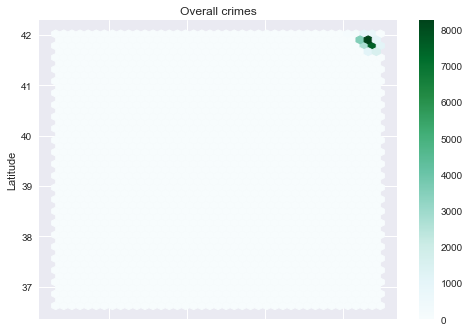

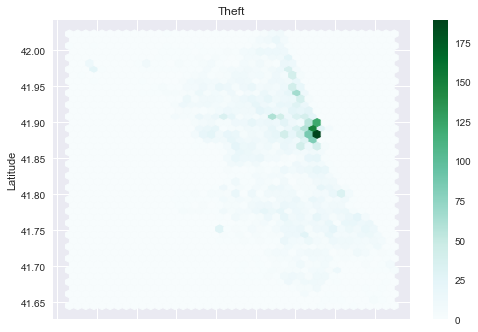

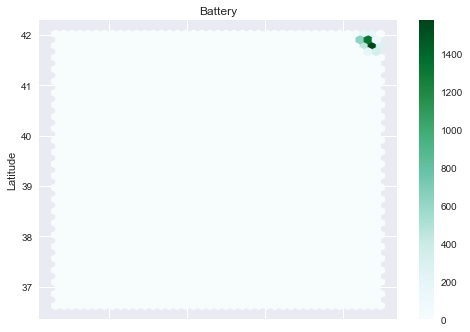

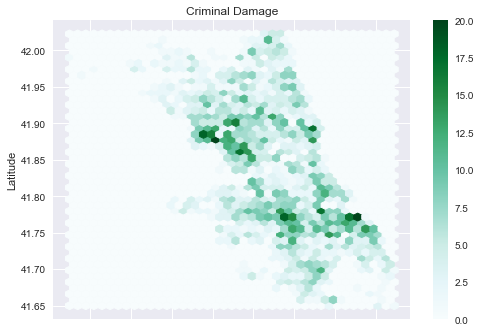

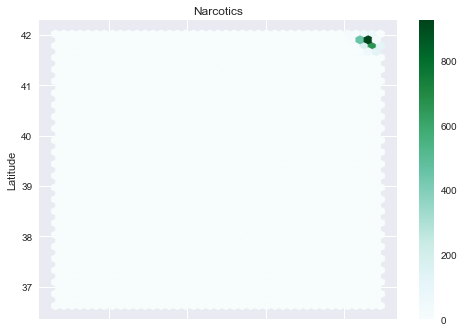

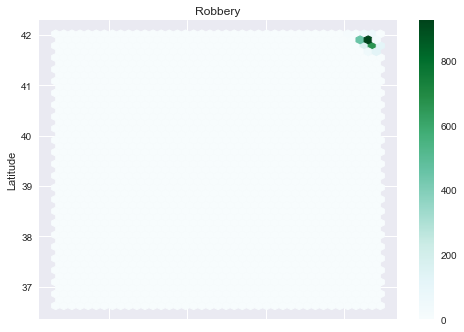

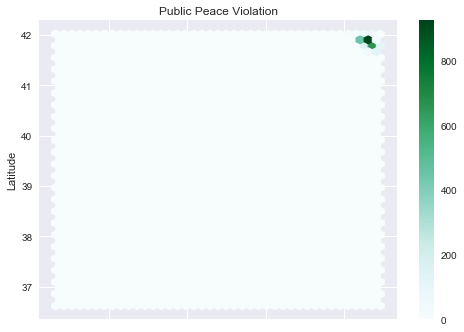

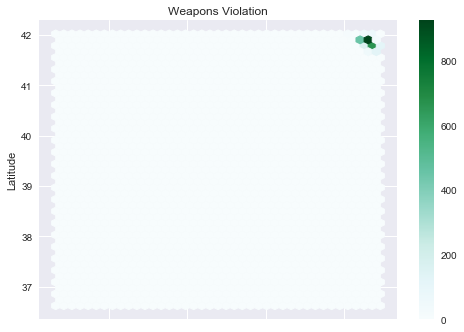

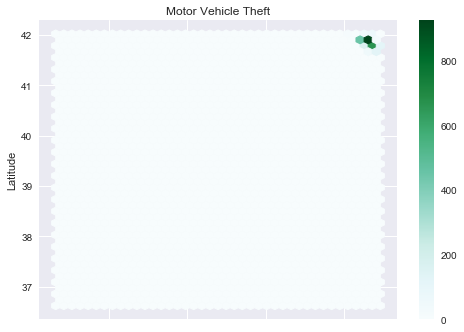

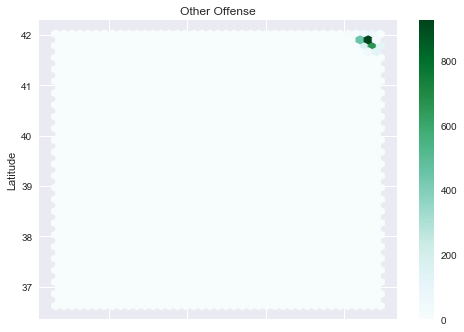

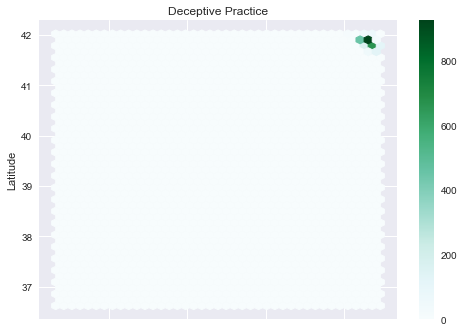

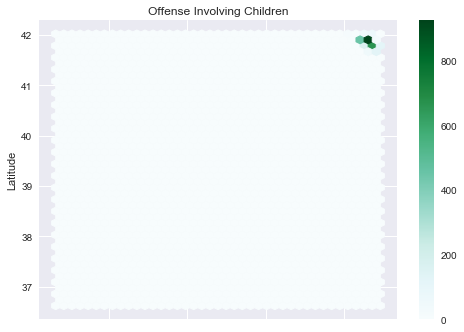

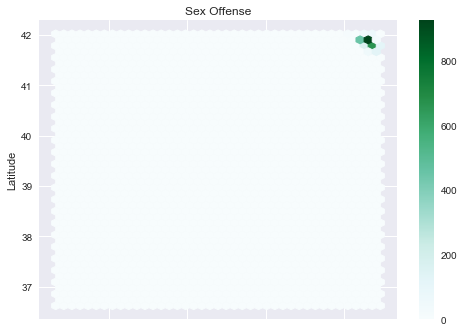

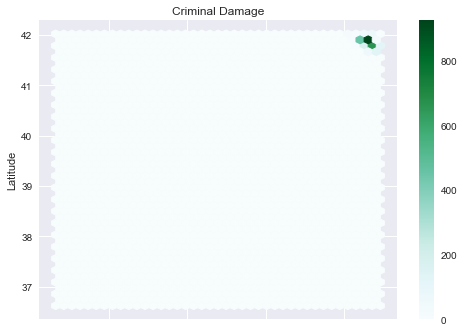

In [89]:
print("Heat map over cooridantes of crimes")
x.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Overall crimes")
plt.show()

x_theft.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Theft")

x_battery.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Battery")

x_cd.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Criminal Damage")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Narcotics")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Robbery")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Public Peace Violation")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Weapons Violation")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Motor Vehicle Theft")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Other Offense")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Deceptive Practice")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Offense Involving Children")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Sex Offense")
plt.show()

x_narc.plot.hexbin(x='Longitude', y='Latitude', gridsize=40)
plt.title("Criminal Damage")
plt.show()

### Analyzing thefts

In [22]:
crimes_theft = crimes[crimes['Primary Type'] == 'THEFT']

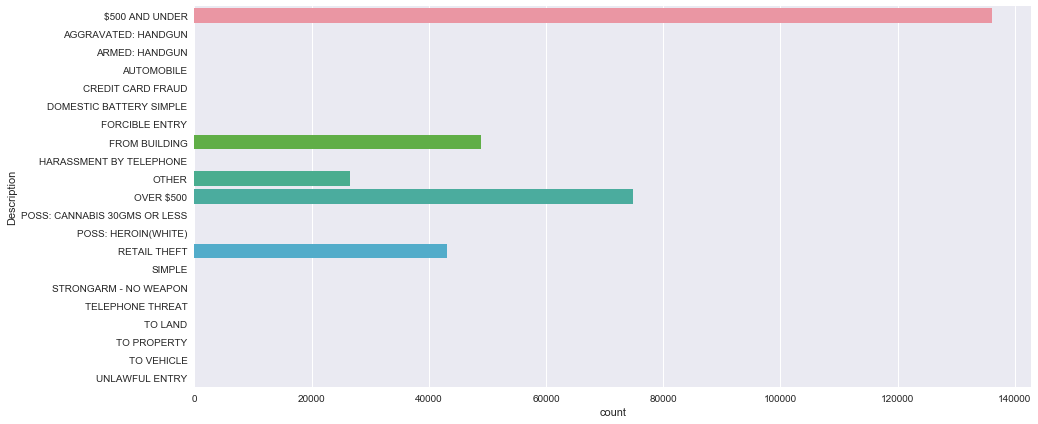

In [23]:
plt.figure(figsize = (15, 7))
sns.countplot(y = crimes_theft['Description'])

In [24]:
crimes_theft_data = pd.DataFrame({"Counts": crimes_theft['Description'].value_counts(), "Description" : crimes_theft['Description'].value_counts().index})

In [25]:
crimes_theft_data.reset_index(inplace=True)

In [26]:
crimes_theft_data = crimes_theft_data.drop(columns=['index'], axis = 1)
crimes_theft_data.head()

,Counts,Description
0,136036,$500 AND UNDER
1,74906,OVER $500
2,48835,FROM BUILDING
3,43109,RETAIL THEFT
4,26574,OTHER


In [27]:
%%time
crimes_theft['Date'] = pd.to_datetime(crimes_theft['Date'])

Wall time: 146 ms


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
crimes_theft['Month'] = crimes_theft['Date'].apply(lambda x : x.month)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
theft_in_months = pd.DataFrame({"thefts" : crimes_theft['Month'].value_counts(), "month" : crimes_theft["Month"].value_counts().index}, index = range(12))

In [30]:
theft_in_months.head()

,thefts,month
0,NaN,7
1,26982.0,8
2,20667.0,6
3,24702.0,9
4,25686.0,10


In [32]:
print(max(crimes_theft['Date']))
print(min(crimes_theft['Date']))

2017-01-18 23:00:00
2012-01-01 00:00:00


## Conclusion

According to our analysis,

1.It can be concluded that the Crime has decreased over the years from 2012-2017.

2.Theft is the highest committed crime.

3.Weekdays encountered more number of crimes as compared to weekends.

4.It is observed that crimes committed were highest on street and lowest on Business/Commercial Office.


